In [9]:
#Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit#Import necessary packages
from qiskit import Aer, execute
from qiskit.visualization import *
import numpy as np
import matplotlib as mpl

In [10]:
#Multiplexer, 8 equations, equation 8 and 5a and 5b. NO THROWAWAY BITS

a = QuantumRegister(15, 'q')
multiplexer = QuantumCircuit(a, name='Multiplexer')

#column 1
#minterms
m1=6
m2=7
m3=8
#controls
c1=3
c2=4
c3=5

#111,110,101,100,011,010,001,000
for x in range(0, 3):
    multiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    #multiplexer.barrier()
    m1+=3
    m2+=3
    m3+=3

#column 2

m1-=9
m2-=7
m3-=5 

c1-=3
c2-=3
c3-=3

for x in range(0, 3):
    multiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    multiplexer.x(c2)
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    multiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    multiplexer.x(c3)
    multiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    multiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    multiplexer.x(c1)
    multiplexer.x(c2)
    multiplexer.x(c3)
    #multiplexer.barrier()
    m1+=1
    m2+=1
    m3+=1

multiplexer.to_gate()
#multiplexer.draw('mpl')

Instruction(name='Multiplexer', num_qubits=15, num_clbits=0, params=[])

In [11]:
#Mirror for multiplexer
mirrormultiplexer = QuantumCircuit(15, name='Mirror Multiplexer')

#minterms
m1=9
m2=12
m3=15

#controls
c1=0
c2=1
c3=2

#column 2
for x in range(0, 3):
    m1-=1
    m2-=1
    m3-=1
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a

c1+=3
c2+=3
c3+=3

m1+=9
m2+=7
m3+=5

#column 1
for x in range(0, 3):
    m1-=3
    m2-=3
    m3-=3
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 5b
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 5b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 5a
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 5a
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m3) #Eq 8f
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m2],m1) #Eq 8e
    mirrormultiplexer.x(c1)
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m3) #Eq 8d
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m1],m2) #Eq 8c
    mirrormultiplexer.x(c2)
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m2) #Eq 8b
    mirrormultiplexer.x(c3)
    mirrormultiplexer.mct([c1,c2,c3,m3],m1) #Eq 8a

mirrormultiplexer.to_gate()
#mirrormultiplexer.draw('mpl')

Instruction(name='Mirror Multiplexer', num_qubits=15, num_clbits=0, params=[])

In [12]:
mirrorCounterComparator = QuantumCircuit(19, name='Mirror Cost Counter and Comparator')
#greater than comparator mirror


#counter mirror
'''
i=14
ja=15
jb=16
jc=17
jd=18
'''
i=14
ja=15
jb=16
jc=17
jd=18
for x in range(0, 9):
    mirrorCounterComparator.cx(i,ja)
    mirrorCounterComparator.mct([i,ja],jb)
    mirrorCounterComparator.mct([i,ja,jb],jc)
    mirrorCounterComparator.mct([i,ja,jb,jc],jd)
    i-=1
#counter works--q18 q17 q16 q15-->0001, 0010, 0011, 0100,etc
#counterComparator.measure([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
mirrorCounterComparator.to_gate()
#mirrorCounterComparator.draw('mpl')

Instruction(name='Mirror Cost Counter and Comparator', num_qubits=19, num_clbits=0, params=[])

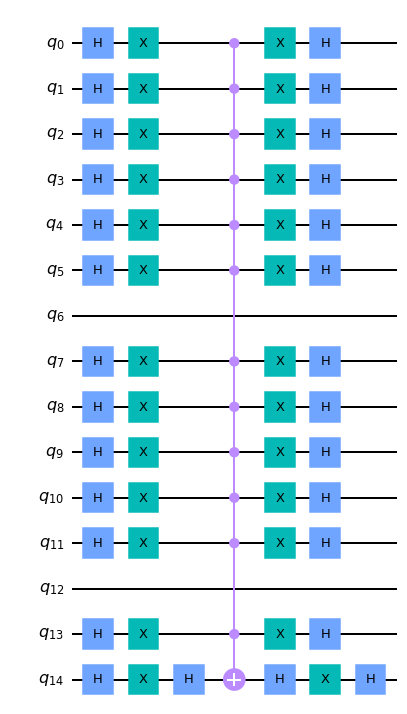

In [13]:
diffusion = QuantumCircuit(15, name='Diffusion')
diffusion.h([0,1,2,3,4,5,7,8,9,10,11,13,14])
diffusion.x([0,1,2,3,4,5,7,8,9,10,11,13,14])
diffusion.h(14)
diffusion.mct([0,1,2,3,4,5,7,8,9,10,11,13],14)
diffusion.h(14)
diffusion.x([0,1,2,3,4,5,7,8,9,10,11,13,14])
diffusion.h([0,1,2,3,4,5,7,8,9,10,11,13,14])
diffusion.to_gate()
diffusion.draw('mpl')

In [14]:
#
#Cost counter and comparator, threshold value SAT problem
counterComparator = QuantumCircuit(20, name='Cost Counter and Comparator')
#counterComparator = QuantumCircuit(27, 16)
#counter--count the number of 1s, non zero coefficients q(P)
#"count ones" function
#standard adders to get the final number of 1s
i=6
ja=15
jb=16
jc=17
jd=18
for x in range(0, 9):
    counterComparator.mct([i,ja,jb,jc],jd)
    counterComparator.mct([i,ja,jb],jc)
    counterComparator.mct([i,ja],jb)
    counterComparator.cx(i,ja)
    i+=1
#counter works--q19 q18 q17 q16-->0001, 0010, 0011, 0100,etc
#counterComparator.barrier()

#counterComparator.x(15)
counterComparator.x(16)
counterComparator.x(17)
counterComparator.x(18)
counterComparator.mct([15,16,17,18],19)
counterComparator.x(18)
counterComparator.x(17)
counterComparator.x(16)
#counterComparator.x(15)

counterComparator.to_gate()
#counterComparator.draw('mpl')
#test

Instruction(name='Cost Counter and Comparator', num_qubits=20, num_clbits=0, params=[])

In [44]:
qr = QuantumRegister(20, 'q')
cr = ClassicalRegister(13, 'c')
qc = QuantumCircuit(qr, cr)


qc.x(19)
qc.h([0,1,2,3,4,5,19]+[7,8,9,10,11,13,14])
qc.x(6)
for x in range(37):
    qc.append(multiplexer,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(counterComparator,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    qc.append(mirrorCounterComparator,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
    qc.append(mirrormultiplexer,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    qc.append(diffusion,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
qc.measure([0,1,2,3,4,5,7,8,9,10,11,13,14],[0,1,2,3,4,5,6,7,8,9,10,11,12])
#qc.draw('mpl')

In [45]:
import numpy as np
import math
print(math.pi)
hi = ((math.pi)/4)*np.sqrt(2**6)
print(hi)
np.sqrt(2**13/8)

3.141592653589793
6.283185307179586


32.0

In [46]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(qc, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(qc)
from qiskit.visualization import plot_histogram #histogram
#print(counts)

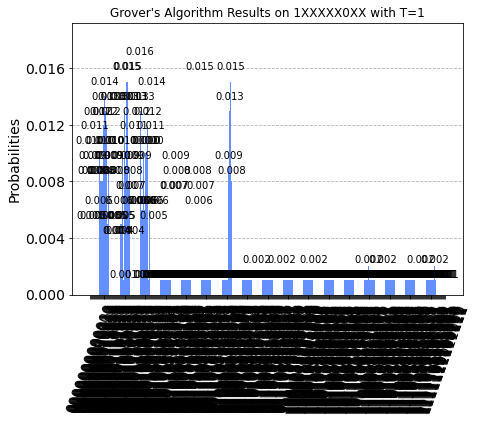

In [53]:
plot_histogram(counts, title="Grover's Algorithm Results on 1XXXXX0XX with T=1")

In [48]:
counts

{'0010000010001': 1,
 '0011011010000': 1,
 '0100011101010': 1,
 '0000000111110': 13,
 '0000000111111': 5,
 '1110000001100': 1,
 '0111010100111': 1,
 '0000001110010': 4,
 '1010010001101': 1,
 '0000011000110': 12,
 '0011111100101': 15,
 '0000100011110': 10,
 '0000100000110': 10,
 '1010001101000': 1,
 '0000000110000': 14,
 '0000000000111': 5,
 '1101100100011': 1,
 '1011001000101': 1,
 '0000000010111': 6,
 '0000100110110': 14,
 '1011101001111': 1,
 '0000000011110': 8,
 '0000100111101': 5,
 '1000100111110': 1,
 '0110001101101': 1,
 '1010100100011': 1,
 '1101100111100': 1,
 '0000100110101': 11,
 '0000001101010': 13,
 '0000000110011': 12,
 '1100011111111': 1,
 '0111011001010': 1,
 '0000100111110': 6,
 '0100001110000': 1,
 '0000000111011': 10,
 '1010011001010': 1,
 '0001011011100': 1,
 '1000111100110': 1,
 '0000100010101': 10,
 '0000011000000': 11,
 '1101010001000': 1,
 '0110100110101': 1,
 '0000000110111': 9,
 '0000000000000': 10,
 '0100010110101': 1,
 '0101010011001': 1,
 '1011110101111': 2,

In [49]:
d=counts
d = {k: d[k] for k in d.keys() if int(d.get(k))>10}

In [50]:
d

{'0000000111110': 13,
 '0000011000110': 12,
 '0011111100101': 15,
 '0000000110000': 14,
 '0000100110110': 14,
 '0000100110101': 11,
 '0000001101010': 13,
 '0000000110011': 12,
 '0000011000000': 11,
 '0011111000110': 13,
 '0000000110010': 13,
 '0000011100000': 16,
 '0000010001000': 13,
 '0000000010000': 11,
 '0000100010110': 12,
 '0000010001110': 15,
 '0000011000010': 13,
 '0000010001011': 15,
 '0000010111111': 13,
 '0000011100010': 13,
 '0000000010110': 12,
 '0010110111101': 15,
 '0000000011111': 12}

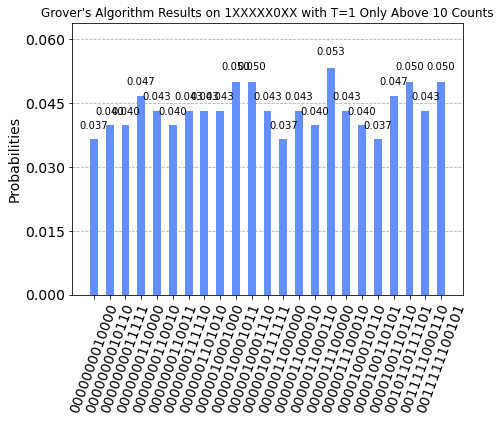

In [54]:
plot_histogram(d, title="Grover's Algorithm Results on 1XXXXX0XX with T=1 Only Above 10 Counts")

In [43]:
for i, j in counts.items():
    if j > 12:
        print(i)

0001101101101
0000000000110
0000010001010
0000000011011
0000000011010
0000000110111
0000100000101
0011111000101
0001101110101
0000000011110
0000010001110
0000100010110
0000010111010
0000001101110
0000100000110
0000000010110
0000010001011
0011111000110
0001101110110
0000001101111
0000011100111
0001101101110
0000000110000
0000100010101
0000100110101
0000001110010
0000010001000


In [34]:
0100111010010

1010010

1--
---
0--



SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (Temp/ipykernel_35220/1311548943.py, line 1)

In [ ]:
max_key = max(counts, key=counts.get)
print(max_key)


In [6]:
qr = QuantumRegister(15, 'q')
cr = ClassicalRegister(15, 'c')
oracle = QuantumCircuit(qr, cr)

#polarity

oracle.x([2,5])
#001001
oracle.x([6,7,8,9,10,11,12,13,14])

#column 1
#minterms
m1=6
m2=7
m3=8
#controls
c1=3
c2=4
c3=5
#111,110,101,100,011,010,001,000
for x in range(0, 3):
    oracle.mct([c1,c2,c3,m3],m1) #Eq 8a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m3],m2) #Eq 8b
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 8c
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m3) #Eq 8d
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 8e
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m3) #Eq 8f
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 5a
    oracle.mct([c1,c2,c3,m1],m3) #Eq 5a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 5b
    oracle.mct([c1,c2,c3,m2],m3) #Eq 5b
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    m1+=3
    m2+=3
    m3+=3

#column 2

m1-=9
m2-=7
m3-=5 

c1-=3
c2-=3
c3-=3

for x in range(0, 3):
    oracle.mct([c1,c2,c3,m3],m1) #Eq 8a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m3],m2) #Eq 8b
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 8c
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m3) #Eq 8d
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 8e
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m3) #Eq 8f
    oracle.x(c2)
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m1],m2) #Eq 5a
    oracle.mct([c1,c2,c3,m1],m3) #Eq 5a
    oracle.x(c3)
    oracle.mct([c1,c2,c3,m2],m1) #Eq 5b
    oracle.mct([c1,c2,c3,m2],m3) #Eq 5b
    oracle.x(c1)
    oracle.x(c2)
    oracle.x(c3)
    m1+=1
    m2+=1
    m3+=1
oracle.measure([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[14,13,12,11,10,9,8,7,6,5,4,3,2,1,0])
#oracle.draw('mpl')

In [7]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(oracle, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(oracle)
from qiskit.visualization import plot_histogram #histogram
print(counts)

{'001001100000000': 1000}


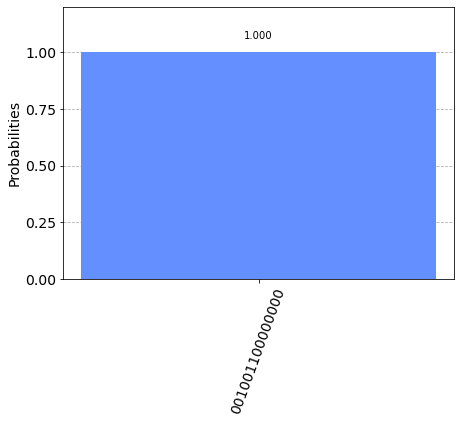

In [8]:
plot_histogram(counts)